# 1. Для дослідження даних, візуалізуйте їх. Виведіть зображення перших 24 і 36 цифр з набору

In [84]:
from sklearn.datasets import load_digits

digits = load_digits()
image_13 = digits.data[13].reshape(8, 8)

print(image_13)
print(digits.target[13])

[[ 0.  2.  9. 15. 14.  9.  3.  0.]
 [ 0.  4. 13.  8.  9. 16.  8.  0.]
 [ 0.  0.  0.  6. 14. 15.  3.  0.]
 [ 0.  0.  0. 11. 14.  2.  0.  0.]
 [ 0.  0.  0.  2. 15. 11.  0.  0.]
 [ 0.  0.  0.  0.  2. 15.  4.  0.]
 [ 0.  1.  5.  6. 13. 16.  6.  0.]
 [ 0.  2. 12. 12. 13. 11.  0.  0.]]
3


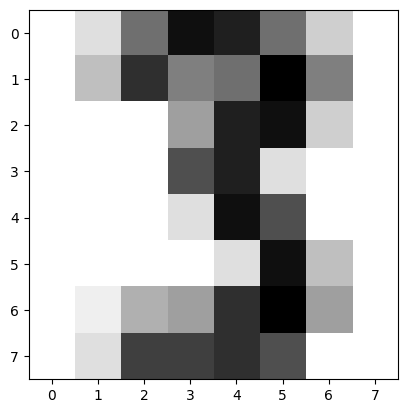

In [85]:
import matplotlib.pyplot as plt

plt.imshow(image_13, cmap=plt.cm.gray_r)

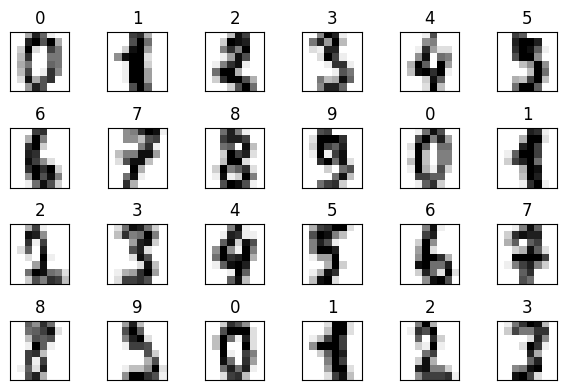

In [86]:
def display_24():
    figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

    for item in zip(axes.ravel(), digits.images, digits.target):
        axes, image, target = item
        axes.imshow(image, cmap=plt.cm.gray_r)

        axes.set_xticks([])
        axes.set_yticks([])
        axes.set_title(target)
    plt.tight_layout()

display_24()

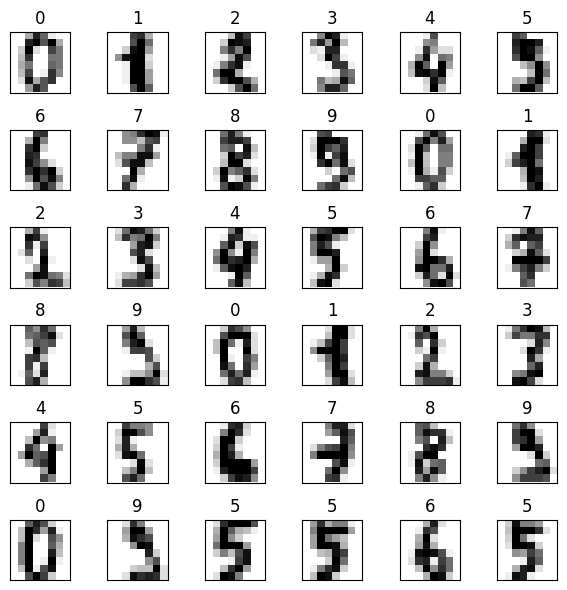

In [87]:
def display_36():
    figure, axes = plt.subplots(nrows=6, ncols=6, figsize=(6, 6))

    for item in zip(axes.ravel(), digits.images, digits.target):
        axes, image, target = item
        axes.imshow(image, cmap=plt.cm.gray_r)

        axes.set_xticks([])
        axes.set_yticks([])
        axes.set_title(target)
    plt.tight_layout()

display_36()

# 2. Розбийте дані на навчальні та тестові, за замовчуванням train_test_split резервує 75% даних для навчання і 25% для тестування, змініть це.

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11)

print(X_train.shape)
print(X_test.shape)

(1347, 64)
(450, 64)


# 3. Створити та навчити модель

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

# 4. Виконайте прогнозування класів

In [90]:
predicted = knn.predict(X=X_test)
expected = y_test

# 5. Порівняйте прогнозовані цифри з очікуваними для перших 20, 24, 36 тестових зразків

In [91]:
import pandas as pd

def is_correct_predict(num: int):
    pred_n = predicted[:num]
    exp_n = expected[:num]

    print(f'For the {num}th first numbers:')
    print(pd.DataFrame({'expected': exp_n, 'predicted': pred_n, 'is_correct': (pred_n == exp_n)}))

is_correct_predict(20)
is_correct_predict(24)
is_correct_predict(36)

For the 20th first numbers:
    expected  predicted  is_correct
0          0          0        True
1          4          4        True
2          9          9        True
3          9          9        True
4          3          3        True
5          1          1        True
6          4          4        True
7          1          1        True
8          5          5        True
9          0          0        True
10         4          4        True
11         9          9        True
12         4          4        True
13         1          1        True
14         5          5        True
15         3          3        True
16         3          3        True
17         8          8        True
18         3          5       False
19         6          6        True
For the 24th first numbers:
    expected  predicted  is_correct
0          0          0        True
1          4          4        True
2          9          9        True
3          9          9        True
4       

# 6. Поясніть результат, застосуйте метрики точності моделі.

## 6.1 Метод score оцінювача

In [92]:
knn_score = knn.score(X_test, y_test)
print(f'{knn_score:.2%}')

97.78%


## 6.2 Матриця невідповідностей.

In [93]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]], dtype=int64)

Візуалізуємо матрицю невідповідностей

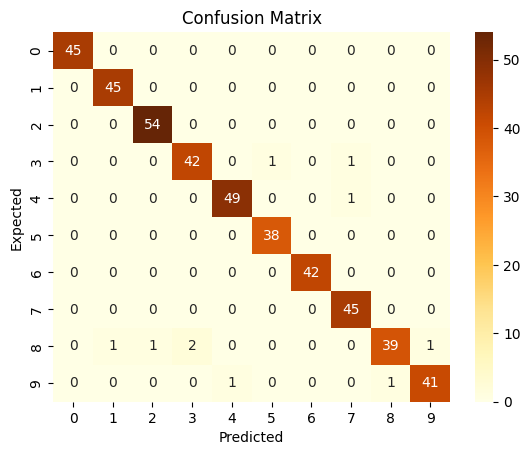

In [94]:
import seaborn as sns

sns.heatmap(confusion, annot=True, fmt='d', cmap='YlOrBr')

plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.title('Confusion Matrix')
plt.show()

# 7. Виведіть звіт класифікації

In [95]:
from sklearn.metrics import classification_report

names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



# 8. Використайте декілька моделей KNeighborsClassifier, SVC і GaussianNB для пошуку найкращої

SVC

In [96]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

svc_score = svc.score(X_test, y_test)
print(f'{svc_score:.2%}')

98.67%


GaussianNB

In [97]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_score = gnb.score(X_test, y_test)
print(f'{gnb_score:.2%}')

86.89%


# 9. Налаштуйте гіперпараметр K в KNeighborsClassifier

### n_neighbors=3

In [98]:
knn_test1 = KNeighborsClassifier(n_neighbors=3)
knn_test1.fit(X=X_train, y=y_train)

knn1_score = knn_test1.score(X_test, y_test)
print(f'{knn1_score:.2%}')

98.22%


### n_neighbors=1

In [99]:
knn_test2 = KNeighborsClassifier(n_neighbors=1)
knn_test2.fit(X=X_train, y=y_train)

knn2_score = knn_test2.score(X_test, y_test)
print(f'{knn2_score:.2%}')

98.44%


### n_neighbors=7

In [100]:
knn_test3 = KNeighborsClassifier(n_neighbors=7)
knn_test3.fit(X=X_train, y=y_train)

knn3_score = knn_test3.score(X_test, y_test)
print(f'{knn3_score:.2%}')

98.00%


### n_neighbors=9

In [101]:
knn_test4 = KNeighborsClassifier(n_neighbors=7)
knn_test4.fit(X=X_train, y=y_train)

knn4_score = knn_test4.score(X_test, y_test)
print(f'{knn4_score:.2%}')

98.00%
